In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
  
%matplotlib inline 
import plotly_express as px
import matplotlib.pyplot as mp
from sklearn import preprocessing

In [8]:
df = pd.read_csv(r'CHEY_3500_14000_ML_covariates_2208.csv')
df = df.rename(columns={'sampling_r': 'period'})
df = df.rename(columns={'cea_name':'CEA'})
df = df.rename(columns={'property_n':'property_name'})
df = df.rename(columns={'core_120_c':'carbon_core_120'})
df = df.rename(columns={'core_carbo':'carbon_core_120'}) 
df = df.rename(columns={'core_120_carbon_mass':'carbon_core_120'}) 
df = df.rename(columns={'core_carbon_mass':'carbon_core_30'})
df = df.drop(['property_name','CEA','strata_nam','sampling_round','core_number','actual_lat','actual_lon'], axis = 1)
df.tail()

,carbon_core_30,carbon_core_120,difference,TopoWetnes,NDVI_mean,MRVBF,gammaTh,gammaK,B12_201911,B12_201907,B04_201911,B04_201907
107,76.892034,76.531685,-0.36,6.20022,0.33731,3.70164,7.71260,1.50333,0.3647,0.2473,0.1572,0.0910
108,87.188081,89.246130,2.06,7.10148,0.35158,2.48592,7.84895,1.53793,0.3741,0.2521,0.1660,0.0962
109,54.130453,64.958555,10.83,9.14569,0.35857,2.66515,8.31000,1.61335,0.3589,0.2562,0.1580,0.0925
110,31.544600,51.076538,19.53,7.46652,0.36390,1.84804,9.12407,1.75312,0.3571,0.2712,0.1770,0.1154
111,54.848849,65.136717,10.29,7.11367,0.34377,2.61289,7.83192,1.53432,0.3760,0.2582,0.1676,0.0963


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carbon_core_30   112 non-null    float64
 1   carbon_core_120  112 non-null    float64
 2   difference       112 non-null    float64
 3   TopoWetnes       112 non-null    float64
 4   NDVI_mean        112 non-null    float64
 5   MRVBF            112 non-null    float64
 6   gammaTh          112 non-null    float64
 7   gammaK           112 non-null    float64
 8   B12_201911       112 non-null    float64
 9   B12_201907       112 non-null    float64
 10  B04_201911       112 non-null    float64
 11  B04_201907       112 non-null    float64
dtypes: float64(12)
memory usage: 10.6 KB


In [10]:
# get the columns we want
cols_to_norm_df = df.drop('carbon_core_120', axis = 1)
# convert to array
# transform all the data
df_array = np.array(cols_to_norm_df)
df_array

array([[54.34875161, 16.17      ,  4.91948   , ...,  0.3422    ,
         0.1446    ,  0.1216    ],
       [48.78714425, 25.57      ,  5.29179   , ...,  0.2781    ,
         0.1558    ,  0.0997    ],
       [81.96399532, 18.76      ,  6.18002   , ...,  0.2796    ,
         0.1526    ,  0.111     ],
       ...,
       [54.13045347, 10.83      ,  9.14569   , ...,  0.2562    ,
         0.158     ,  0.0925    ],
       [31.54460008, 19.53      ,  7.46652   , ...,  0.2712    ,
         0.177     ,  0.1154    ],
       [54.84884868, 10.29      ,  7.11367   , ...,  0.2582    ,
         0.1676    ,  0.0963    ]])

In [11]:
target_df = df['carbon_core_120'].reset_index()
target_df

,index,carbon_core_120
0,0,70.518895
1,1,74.356385
2,2,100.725175
3,3,83.860714
4,4,90.201231
...,...,...
107,107,76.531685
108,108,89.246130
109,109,64.958555
110,110,51.076538


In [12]:
# df_trans = preprocessing(df_trans['slope'])
d = preprocessing.normalize(df_array, axis = 0)
scaled_df = pd.DataFrame(d , columns = cols_to_norm_df.columns).reset_index()
scaled_df
# merge with only column 1 of df
transformed_df = target_df.merge(scaled_df, on = 'index', how = 'left').drop('index', axis = 1)
transformed_df


,carbon_core_120,carbon_core_30,difference,TopoWetnes,NDVI_mean,MRVBF,gammaTh,gammaK,B12_201911,B12_201907,B04_201911,B04_201907
0,70.518895,0.074048,0.074669,0.080653,0.086111,0.024155,0.121409,0.106694,0.106744,0.142035,0.097083,0.132734
1,74.356385,0.066471,0.118076,0.086756,0.091066,0.022272,0.116505,0.101503,0.105128,0.115429,0.104602,0.108829
2,100.725175,0.111673,0.086629,0.101318,0.095552,0.159323,0.117738,0.099283,0.100024,0.116052,0.102454,0.121164
3,83.860714,0.099001,0.051719,0.086060,0.090921,0.005117,0.121228,0.105857,0.098550,0.080024,0.086878,0.073790
4,90.201231,0.076294,0.157927,0.084646,0.102114,0.007452,0.115889,0.097322,0.072949,0.089197,0.091846,0.106100
...,...,...,...,...,...,...,...,...,...,...,...,...
107,76.531685,0.104763,-0.001662,0.101650,0.087705,0.305335,0.082827,0.083312,0.103398,0.102645,0.105542,0.099332
108,89.246130,0.118791,0.009513,0.116425,0.091415,0.205055,0.084292,0.085229,0.106063,0.104638,0.111451,0.105008
109,64.958555,0.073751,0.050010,0.149939,0.093232,0.219839,0.089243,0.089409,0.101754,0.106339,0.106079,0.100970
110,51.076538,0.042978,0.090185,0.122410,0.094618,0.152438,0.097986,0.097155,0.101243,0.112565,0.118836,0.125966


In [13]:
df.columns

Index(['carbon_core_30', 'carbon_core_120', 'difference', 'TopoWetnes',
       'NDVI_mean', 'MRVBF', 'gammaTh', 'gammaK', 'B12_201911', 'B12_201907',
       'B04_201911', 'B04_201907'],
      dtype='object')

In [14]:
df

,carbon_core_30,carbon_core_120,difference,TopoWetnes,NDVI_mean,MRVBF,gammaTh,gammaK,B12_201911,B12_201907,B04_201911,B04_201907
0,54.348752,70.518895,16.17,4.91948,0.33118,0.29283,11.30518,1.92526,0.3765,0.3422,0.1446,0.1216
1,48.787144,74.356385,25.57,5.29179,0.35024,0.27001,10.84857,1.83158,0.3708,0.2781,0.1558,0.0997
2,81.963995,100.725175,18.76,6.18002,0.36749,1.93151,10.96332,1.79153,0.3528,0.2796,0.1526,0.1110
3,72.663341,83.860714,11.20,5.24931,0.34968,0.06203,11.28832,1.91015,0.3476,0.1928,0.1294,0.0676
4,55.997293,90.201231,34.20,5.16306,0.39273,0.09034,10.79119,1.75613,0.2573,0.2149,0.1368,0.0972
...,...,...,...,...,...,...,...,...,...,...,...,...
107,76.892034,76.531685,-0.36,6.20022,0.33731,3.70164,7.71260,1.50333,0.3647,0.2473,0.1572,0.0910
108,87.188081,89.246130,2.06,7.10148,0.35158,2.48592,7.84895,1.53793,0.3741,0.2521,0.1660,0.0962
109,54.130453,64.958555,10.83,9.14569,0.35857,2.66515,8.31000,1.61335,0.3589,0.2562,0.1580,0.0925
110,31.544600,51.076538,19.53,7.46652,0.36390,1.84804,9.12407,1.75312,0.3571,0.2712,0.1770,0.1154


In [15]:
df

,carbon_core_30,carbon_core_120,difference,TopoWetnes,NDVI_mean,MRVBF,gammaTh,gammaK,B12_201911,B12_201907,B04_201911,B04_201907
0,54.348752,70.518895,16.17,4.91948,0.33118,0.29283,11.30518,1.92526,0.3765,0.3422,0.1446,0.1216
1,48.787144,74.356385,25.57,5.29179,0.35024,0.27001,10.84857,1.83158,0.3708,0.2781,0.1558,0.0997
2,81.963995,100.725175,18.76,6.18002,0.36749,1.93151,10.96332,1.79153,0.3528,0.2796,0.1526,0.1110
3,72.663341,83.860714,11.20,5.24931,0.34968,0.06203,11.28832,1.91015,0.3476,0.1928,0.1294,0.0676
4,55.997293,90.201231,34.20,5.16306,0.39273,0.09034,10.79119,1.75613,0.2573,0.2149,0.1368,0.0972
...,...,...,...,...,...,...,...,...,...,...,...,...
107,76.892034,76.531685,-0.36,6.20022,0.33731,3.70164,7.71260,1.50333,0.3647,0.2473,0.1572,0.0910
108,87.188081,89.246130,2.06,7.10148,0.35158,2.48592,7.84895,1.53793,0.3741,0.2521,0.1660,0.0962
109,54.130453,64.958555,10.83,9.14569,0.35857,2.66515,8.31000,1.61335,0.3589,0.2562,0.1580,0.0925
110,31.544600,51.076538,19.53,7.46652,0.36390,1.84804,9.12407,1.75312,0.3571,0.2712,0.1770,0.1154


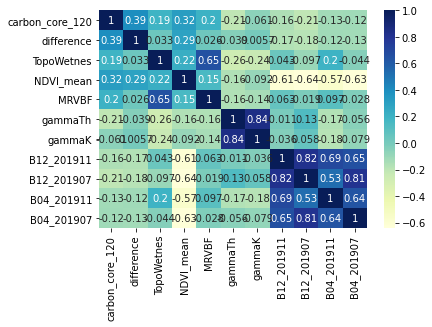

,carbon_core_120,difference,TopoWetnes,NDVI_mean,MRVBF,gammaTh,gammaK,B12_201911,B12_201907,B04_201911,B04_201907
0,70.518895,16.17,4.91948,0.33118,0.29283,11.30518,1.92526,0.3765,0.3422,0.1446,0.1216
1,74.356385,25.57,5.29179,0.35024,0.27001,10.84857,1.83158,0.3708,0.2781,0.1558,0.0997
2,100.725175,18.76,6.18002,0.36749,1.93151,10.96332,1.79153,0.3528,0.2796,0.1526,0.1110
3,83.860714,11.20,5.24931,0.34968,0.06203,11.28832,1.91015,0.3476,0.1928,0.1294,0.0676
4,90.201231,34.20,5.16306,0.39273,0.09034,10.79119,1.75613,0.2573,0.2149,0.1368,0.0972
...,...,...,...,...,...,...,...,...,...,...,...
107,76.531685,-0.36,6.20022,0.33731,3.70164,7.71260,1.50333,0.3647,0.2473,0.1572,0.0910
108,89.246130,2.06,7.10148,0.35158,2.48592,7.84895,1.53793,0.3741,0.2521,0.1660,0.0962
109,64.958555,10.83,9.14569,0.35857,2.66515,8.31000,1.61335,0.3589,0.2562,0.1580,0.0925
110,51.076538,19.53,7.46652,0.36390,1.84804,9.12407,1.75312,0.3571,0.2712,0.1770,0.1154


In [16]:
# try the heatmap with transformed data
heatmap_df = df.drop(['carbon_core_30'], axis = 1) #', 'gamma_tds', 'gamma_k','band_12','mrvbf',], axis = 1)#, 'ogc_6', 'ogc_5', 'ogc_4', 'ogc_3', 'ogc_2', 'ogc_1','clay_idx','v_depth'], axis = 1)
dataplot = sns.heatmap(heatmap_df.corr(), cmap="YlGnBu", annot=True)
# # displaying heatmap
mp.show()

# based on heatmap, now choose highly correlated variables
correlated_df = df.drop( ['carbon_core_30'], axis = 1)#, 'ogc_6', 'ogc_5', 'ogc_4', 'ogc_3', 'ogc_2', 'ogc_1','clay_idx','v_depth'], axis = 1)
correlated_df


In [17]:
correlated_df.describe()

,carbon_core_120,difference,TopoWetnes,NDVI_mean,MRVBF,gammaTh,gammaK,B12_201911,B12_201907,B04_201911,B04_201907
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,83.369646,17.240446,5.695045,0.360998,0.823641,8.684018,1.689914,0.330306,0.222104,0.139241,0.083653
std,22.688773,11.071439,0.890149,0.042001,0.799735,1.422223,0.227753,0.044648,0.050185,0.020576,0.022365
min,37.104359,-1.960000,4.487990,0.267280,0.020100,5.938180,1.056130,0.197000,0.094400,0.071300,0.016400
25%,68.789366,10.267500,5.024020,0.335105,0.277660,7.654005,1.491617,0.299125,0.191000,0.130850,0.070525
50%,79.105197,15.535000,5.516060,0.354340,0.497525,8.415030,1.741765,0.336950,0.221900,0.141700,0.087750
75%,90.088707,23.270000,6.203857,0.380232,1.001995,9.746855,1.899520,0.363225,0.257600,0.152300,0.099825
max,173.814873,54.600000,9.145690,0.514220,3.701640,11.307880,1.983630,0.431000,0.346300,0.177000,0.121600


array([[<AxesSubplot:title={'center':'carbon_core_120'}>,
        <AxesSubplot:title={'center':'difference'}>,
        <AxesSubplot:title={'center':'TopoWetnes'}>],
       [<AxesSubplot:title={'center':'NDVI_mean'}>,
        <AxesSubplot:title={'center':'MRVBF'}>,
        <AxesSubplot:title={'center':'gammaTh'}>],
       [<AxesSubplot:title={'center':'gammaK'}>,
        <AxesSubplot:title={'center':'B12_201911'}>,
        <AxesSubplot:title={'center':'B12_201907'}>],
       [<AxesSubplot:title={'center':'B04_201911'}>,
        <AxesSubplot:title={'center':'B04_201907'}>, <AxesSubplot:>]],
      dtype=object)

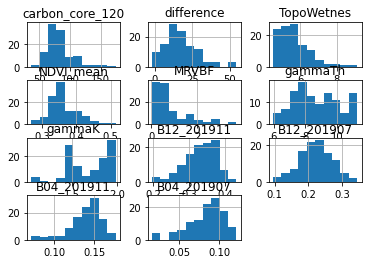

In [18]:
Core_SOC_df = correlated_df
Core_SOC_df.hist()

In [19]:
# Investigating drivers of Core_SOC

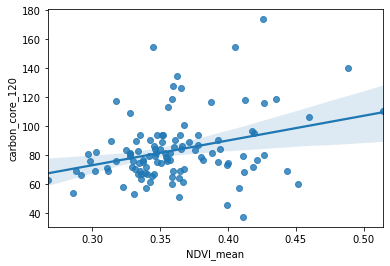

In [20]:
g = sns.regplot(x ='NDVI_mean', y =  'carbon_core_120', data = Core_SOC_df)

In [21]:
df.columns

Index(['carbon_core_30', 'carbon_core_120', 'difference', 'TopoWetnes',
       'NDVI_mean', 'MRVBF', 'gammaTh', 'gammaK', 'B12_201911', 'B12_201907',
       'B04_201911', 'B04_201907'],
      dtype='object')

In [22]:
from pycaret.regression import *

# setup(SOC_percent_df instead of df3 (Core_SOC as target)
# 	R2 from = 0.4959 to 0.5436
exp_reg = setup(df
,target='carbon_core_30'
,normalize = True 		# this changes r2 from 0.27 to 0.2625 - ie not at all
,session_id=123 
,log_experiment=True
,experiment_name='CHEY-30-120_ML'
,ignore_features = ['carbon_core_120']
,feature_interaction = True  	#feature_ratio = True # creation of new features frome existing # r2 from 0.29 to 0.26
,feature_selection = True 	# this changes r2 from 0.27 to 0.29
, feature_selection_threshold = 0.5
, remove_multicollinearity = True
, multicollinearity_threshold = 0.5
#, transform_target = True
 , transformation = True
# , pca = True   			# decrease from 0.29 to 0.1982
)

,Description,Value
0,session_id,123
1,Target,carbon_core_30
2,Original Data,"(112, 12)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(78, 8)"


In [17]:
compare_models()
# MORO first run  = R2 = 0.3685
# Normalise = true  R2 from 0.37 to 0.422
# Transf targ = tru R2 from 0.422 to 0.4199
# transformation tru R2 froom 0.4199 to 0.4478
# Trans targe = Fa R2 from 0.4478 to 0.4557
# Feat interaction R2 from 0.4557 to 0.4671
# ignore features - all except top 2 R2 down to 0.29
# ignore features - all except top 5 R2 up to 0.42 - better to have all features
# turn off ign feat - R2 back to 0.4671
# PCA = True         R2 = 0.4671 - no difference
# feat select thres 0.05 R2 = 0.21 - down don't use this.
# feat select thres 0.80 R2 = 0.37 - increase 
# PCA = Fal		 R2 = 0.38
# feat selec        0.50 R2 = 0.46
# Remove Multicol = Fa 	 R2 = 0.276 - decrease - don't use
# df = ALL the covariates
# MORO 120 cm = train = 0.47
# MORO 30 cm = train = 0.51
# BODO 30 cm = train = 0.21
# CHEY 30 cm = train = -0.2

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,13.4600,335.0871,17.4046,-0.2997,0.2728,0.2372,0.0770
llar,Lasso Least Angle Regression,14.7955,377.3109,18.5571,-0.4349,0.2868,0.2543,0.0060
br,Bayesian Ridge,14.8139,376.7163,18.5605,-0.4401,0.2867,0.2545,0.0080
en,Elastic Net,14.9779,379.0060,18.6306,-0.4445,0.2872,0.2562,0.0150
rf,Random Forest Regressor,14.2857,358.8322,18.0052,-0.4569,0.2802,0.2485,0.0730
knn,K Neighbors Regressor,15.0094,348.2052,18.1530,-0.4617,0.2861,0.2653,0.0070
ridge,Ridge Regression,15.2426,386.2591,18.8109,-0.4719,0.2886,0.2589,0.0060
lar,Least Angle Regression,15.2562,386.8341,18.8252,-0.4744,0.2887,0.2591,0.0050
lr,Linear Regression,15.2562,386.8341,18.8252,-0.4744,0.2887,0.2591,0.5500
lasso,Lasso Regression,15.1682,385.7523,18.8080,-0.4752,0.2897,0.2595,0.0140


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [32]:
model = create_model('et') #, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.1353,72.1075,8.4916,0.0915,0.1335,0.1151
1,10.1418,132.9077,11.5286,0.0874,0.1879,0.1785
2,9.9239,266.0031,16.3096,-1.1130,0.2931,0.2327
3,6.8810,58.7334,7.6638,0.1082,0.1387,0.1316
4,7.2269,60.5068,7.7786,-0.7537,0.1344,0.1324
5,9.1709,123.8002,11.1266,-0.8935,0.2043,0.1876
6,14.2689,383.2894,19.5778,-0.4439,0.2962,0.2189
7,7.5729,100.6147,10.0307,0.1417,0.1409,0.1057
8,7.6026,82.5221,9.0842,-0.5117,0.1360,0.1113
9,12.6456,255.2890,15.9778,-0.2838,0.2119,0.1656


In [33]:
tuned_model= tune_model(model, n_iter=300, optimize = 'R2')
# 300 iterations instead of 50 makes no difference

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.2272,78.5624,8.8635,0.0101,0.1400,0.1328
1,11.0450,139.2104,11.7987,0.0441,0.1885,0.1849
2,7.7526,157.2843,12.5413,-0.2494,0.2498,0.1877
3,7.6135,83.3974,9.1322,-0.2663,0.1637,0.1487
4,7.4582,71.5356,8.4579,-1.0733,0.1466,0.1388
5,7.6791,92.2879,9.6067,-0.4115,0.1838,0.1621
6,12.1129,275.8781,16.6096,-0.0392,0.2430,0.1850
7,8.0968,128.0736,11.3170,-0.0925,0.1594,0.1106
8,5.5541,51.8193,7.1986,0.0507,0.1076,0.0830
9,14.3354,329.4037,18.1495,-0.6565,0.2421,0.1831


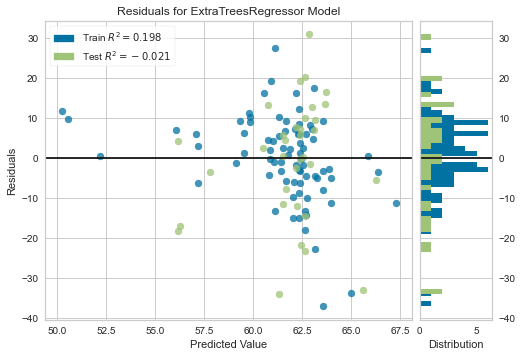

In [34]:
tuned = tuned_model
plot_model(tuned)
# train BODO - untransformed - 120 = 0.58, test = 0.44
# BODO - transformed - 120 train = 0.44, test = 0.466
# untransformed = train = 0.034, test = 0.427

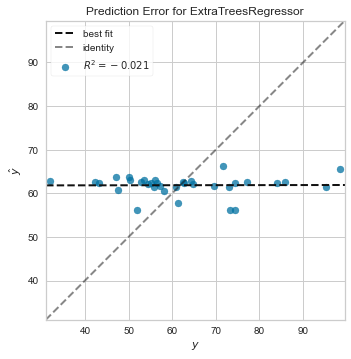

In [35]:
plot_model(tuned, plot = 'error')

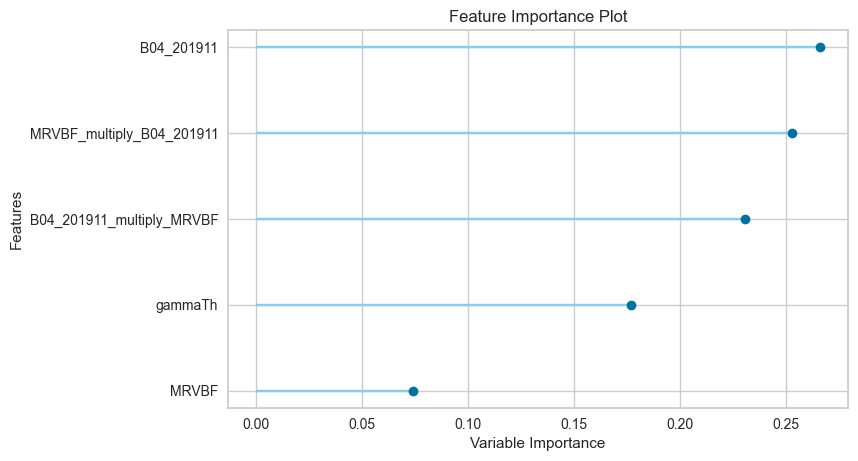

In [36]:
plot_model(tuned, plot = 'feature')

In [39]:
evaluate_model(tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [40]:
from pycaret.regression import *

# setup(SOC_percent_df instead of df3 (Core_SOC as target)
# 	R2 from = 0.4959 to 0.5436
exp_reg = setup(df
,target='carbon_core_120'
,normalize = True 		# this changes r2 from 0.27 to 0.2625 - ie not at all
,session_id=123 
,log_experiment=True
,experiment_name='BODO-30-120_ML'
,ignore_features = ['carbon_core_30']
,feature_interaction = True  	#feature_ratio = True # creation of new features frome existing # r2 from 0.29 to 0.26
,feature_selection = True 	# this changes r2 from 0.27 to 0.29
, feature_selection_threshold = 0.5
, remove_multicollinearity = True
, multicollinearity_threshold = 0.5
#, transform_target = True
 , transformation = True
# , pca = True   			# decrease from 0.29 to 0.1982
)

,Description,Value
0,session_id,123
1,Target,carbon_core_120
2,Original Data,"(112, 11)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(78, 5)"


In [41]:
compare_models()
# MORO first run  = R2 = 0.3685
# Normalise = true  R2 from 0.37 to 0.422
# Transf targ = tru R2 from 0.422 to 0.4199
# transformation tru R2 froom 0.4199 to 0.4478
# Trans targe = Fa R2 from 0.4478 to 0.4557
# Feat interaction R2 from 0.4557 to 0.4671
# ignore features - all except top 2 R2 down to 0.29
# ignore features - all except top 5 R2 up to 0.42 - better to have all features
# turn off ign feat - R2 back to 0.4671
# PCA = True         R2 = 0.4671 - no difference
# feat select thres 0.05 R2 = 0.21 - down don't use this.
# feat select thres 0.80 R2 = 0.37 - increase 
# PCA = Fal		 R2 = 0.38
# feat selec        0.50 R2 = 0.46
# Remove Multicol = Fa 	 R2 = 0.276 - decrease - don't use
# df = ALL the covariates
# MORO 120 cm = train = 0.47
# MORO 30 cm = train = 0.51
# BODO 30 cm = train = 0.21
# BODO 120 cm = train = 0.37
# CHEY 130 cm = train = 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,9.2323,142.0638,11.4152,-0.2621,0.1837,0.1564,0.0690
et,Extra Trees Regressor,9.2570,153.5774,11.7569,-0.3571,0.1877,0.1579,0.0610
llar,Lasso Least Angle Regression,9.4168,150.2930,11.7991,-0.3690,0.1900,0.1596,0.0060
br,Bayesian Ridge,9.4433,150.3806,11.8191,-0.3831,0.1902,0.1601,0.0110
en,Elastic Net,9.3926,149.8859,11.8063,-0.3866,0.1896,0.1590,0.0070
lasso,Lasso Regression,9.4414,150.2520,11.8242,-0.3914,0.1900,0.1599,0.0050
omp,Orthogonal Matching Pursuit,9.4633,150.0789,11.8256,-0.3988,0.1896,0.1601,0.0050
par,Passive Aggressive Regressor,9.9081,160.6465,12.0781,-0.3991,0.1956,0.1668,0.0070
ridge,Ridge Regression,9.5672,152.6459,11.8924,-0.4035,0.1902,0.1613,0.0050
lar,Least Angle Regression,9.5747,152.8245,11.8987,-0.4049,0.1903,0.1614,0.0080


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [42]:
model = create_model('rf') #, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.4687,85.0760,9.2237,-0.0719,0.1457,0.1367
1,11.9036,174.9111,13.2254,-0.2010,0.2124,0.2064
2,8.4577,134.2330,11.5859,-0.0663,0.2315,0.1924
3,7.2992,72.2420,8.4995,-0.0970,0.1530,0.1410
4,7.3088,60.3093,7.7659,-0.7479,0.1334,0.1338
5,8.2140,112.8176,10.6216,-0.7255,0.2002,0.1743
6,13.8700,360.9323,18.9982,-0.3597,0.2841,0.2099
7,8.3615,117.0112,10.8172,0.0019,0.1545,0.1184
8,6.2329,62.4291,7.9012,-0.1436,0.1180,0.0922
9,12.2066,240.6766,15.5138,-0.2103,0.2039,0.1586


In [43]:
tuned_model= tune_model(model, n_iter=300, optimize = 'R2')
# 300 iterations instead of 50 makes no difference

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.3870,61.9642,7.8717,0.2193,0.1264,0.1209
1,10.7135,144.8459,12.0352,0.0054,0.1976,0.1891
2,8.4769,132.3849,11.5059,-0.0516,0.2238,0.1860
3,6.6946,58.4752,7.6469,0.1121,0.1336,0.1260
4,7.4115,61.4698,7.8403,-0.7816,0.1354,0.1318
5,7.8859,85.7512,9.2602,-0.3115,0.1740,0.1595
6,14.2996,387.3930,19.6823,-0.4593,0.2910,0.2086
7,8.8688,128.9739,11.3567,-0.1002,0.1621,0.1242
8,4.7058,52.3995,7.2387,0.0401,0.1093,0.0701
9,11.7995,257.7284,16.0539,-0.2960,0.2078,0.1461


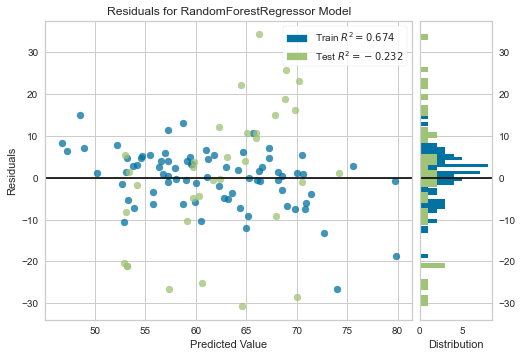

In [44]:
tuned = tuned_model
plot_model(tuned)
# train BODO - untransformed - 120 = 0.58, test = 0.44
# BODO - transformed - 120 train = 0.44, test = 0.466
# untransformed = train = 0.034, test = 0.427

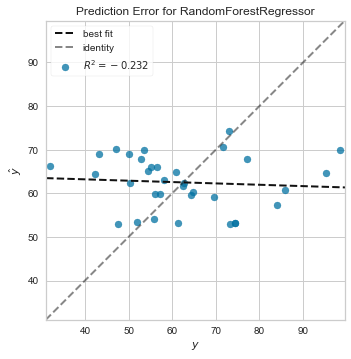

In [45]:
plot_model(tuned, plot = 'error')

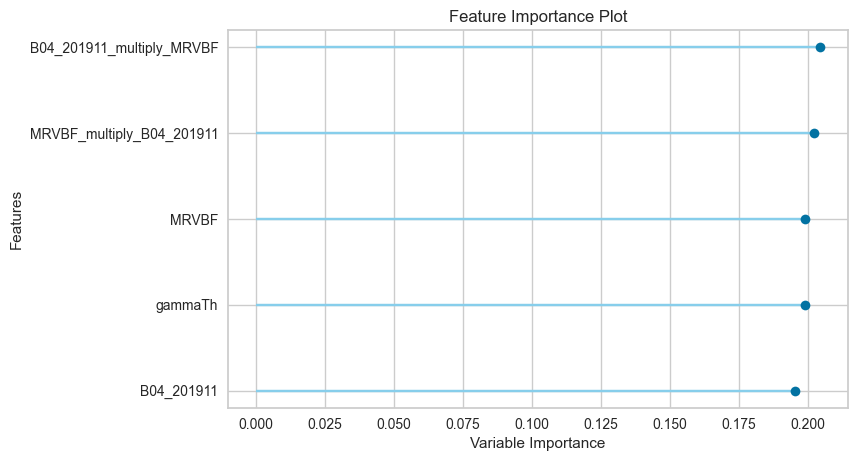

In [46]:
plot_model(tuned, plot = 'feature')

In [23]:
# Normalized = False
from pycaret.regression import *

# setup(SOC_percent_df instead of df3 (Core_SOC as target)
# 	R2 from = 0.4959 to 0.5436
exp_reg = setup(df
,target='carbon_core_30'
,normalize = False 		# this changes r2 from 0.27 to 0.2625 - ie not at all
,session_id=123 
,log_experiment=True
,experiment_name='CHEY-30-120_ML'
,ignore_features = ['carbon_core_120']
,feature_interaction = True  	#feature_ratio = True # creation of new features frome existing # r2 from 0.29 to 0.26
,feature_selection = True 	# this changes r2 from 0.27 to 0.29
, feature_selection_threshold = 0.5
, remove_multicollinearity = True
, multicollinearity_threshold = 0.5
#, transform_target = True
 , transformation = True
# , pca = True   			# decrease from 0.29 to 0.1982
)

,Description,Value
0,session_id,123
1,Target,carbon_core_30
2,Original Data,"(112, 12)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(78, 8)"


In [24]:
compare_models()
# MORO first run  = R2 = 0.3685
# Normalise = true  R2 from 0.37 to 0.422
# Transf targ = tru R2 from 0.422 to 0.4199
# transformation tru R2 froom 0.4199 to 0.4478
# Trans targe = Fa R2 from 0.4478 to 0.4557
# Feat interaction R2 from 0.4557 to 0.4671
# ignore features - all except top 2 R2 down to 0.29
# ignore features - all except top 5 R2 up to 0.42 - better to have all features
# turn off ign feat - R2 back to 0.4671
# PCA = True         R2 = 0.4671 - no difference
# feat select thres 0.05 R2 = 0.21 - down don't use this.
# feat select thres 0.80 R2 = 0.37 - increase 
# PCA = Fal		 R2 = 0.38
# feat selec        0.50 R2 = 0.46
# Remove Multicol = Fa 	 R2 = 0.276 - decrease - don't use
# df = ALL the covariates
# MORO 120 cm = train = 0.47
# MORO 30 cm = train = 0.51
# BODO 30 cm = train = 0.21
# CHEY 30 cm = train = -0.2
# CHEY 120 cm, normal = False = 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,13.2920,343.2329,18.0760,-0.1188,0.2804,0.2384,0.0110
en,Elastic Net,14.4143,363.2751,18.4821,-0.1479,0.2806,0.2459,0.0090
lar,Least Angle Regression,13.8969,342.5591,17.9148,-0.1492,0.2713,0.2368,0.0090
llar,Lasso Least Angle Regression,15.0969,399.0256,19.2345,-0.1532,0.2935,0.2597,0.0140
br,Bayesian Ridge,14.5163,371.3933,18.6486,-0.1564,0.2825,0.2467,0.0070
huber,Huber Regressor,13.9499,407.4606,18.7010,-0.1637,0.2815,0.2238,0.0090
et,Extra Trees Regressor,14.5931,357.0491,18.4514,-0.1654,0.2865,0.2528,0.1110
ridge,Ridge Regression,14.4426,376.7038,18.5997,-0.2131,0.2799,0.2427,0.0060
lasso,Lasso Regression,14.4964,376.1825,18.7622,-0.2162,0.2833,0.2465,0.0070
lr,Linear Regression,14.4963,378.5476,18.6403,-0.2210,0.2804,0.2433,0.5030


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

In [25]:
model = create_model('knn') #, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13.6902,381.0336,19.5201,0.2936,0.2188,0.1613
1,15.2464,404.9070,20.1223,0.0784,0.3675,0.3410
2,11.6795,296.4854,17.2188,0.0571,0.2298,0.1678
3,10.2835,182.2423,13.4997,-0.1947,0.2268,0.1977
4,17.7991,603.3778,24.5637,0.1324,0.3166,0.2585
5,13.2807,300.6121,17.3382,-0.4197,0.3145,0.2873
6,15.6773,455.6115,21.3451,-0.5592,0.3808,0.3470
7,16.3230,497.5318,22.3054,0.2570,0.3913,0.3423
8,7.4045,131.4488,11.4651,0.3100,0.1486,0.0954
9,11.5360,179.0791,13.3820,-1.1432,0.2094,0.1860


In [26]:
tuned_model= tune_model(model, n_iter=50, optimize = 'R2')
# 300 iterations instead of 50 makes no difference

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15.2058,482.9606,21.9764,0.1046,0.2578,0.1861
1,16.6294,429.4272,20.7226,0.0226,0.3674,0.3512
2,10.9970,260.8074,16.1495,0.1705,0.2122,0.1537
3,9.4796,164.7467,12.8354,-0.0800,0.2188,0.1868
4,16.0610,650.4996,25.5049,0.0647,0.3178,0.2154
5,12.1001,237.7824,15.4202,-0.1230,0.2868,0.2581
6,12.9892,316.1568,17.7808,-0.0820,0.3331,0.2928
7,17.1765,568.8532,23.8506,0.1505,0.4012,0.3477
8,10.8289,151.6457,12.3145,0.2040,0.1638,0.1441
9,10.4798,152.3503,12.3430,-0.8234,0.1912,0.1754


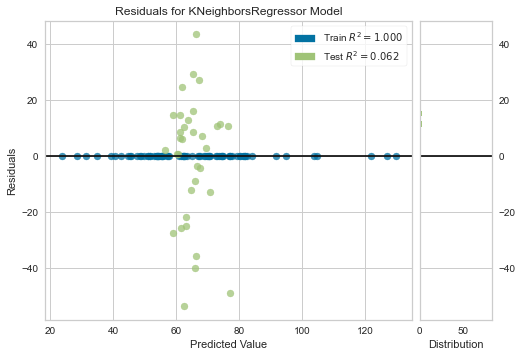

In [27]:
tuned = tuned_model
plot_model(tuned)
# train BODO - untransformed - 120 = 0.58, test = 0.44
# BODO - transformed - 120 train = 0.44, test = 0.466
# untransformed = train = 0.034, test = 0.427